In [42]:
import pandas as pd
import matplotlib.pyplot as plt

## Importacion de Datos

In [6]:
flights_per_dar = pd.read_csv('flights_all_years.csv')

In [3]:
flights_per_dar

,Year,Date,Flights
0,2025 Number of flights,2024-12-31,156956
1,2025 Number of flights,2025-01-01,205823
2,2025 Number of flights,2025-01-02,213193
3,2025 Number of flights,2025-01-03,198500
4,2025 Number of flights,2025-01-04,186594
...,...,...,...
2951,2021 7-day moving average,2025-12-26,155327
2952,2021 7-day moving average,2025-12-27,150982
2953,2021 7-day moving average,2025-12-28,145823
2954,2021 7-day moving average,2025-12-29,141828


In [4]:
flights_per_dar["Year"].value_counts()

2024 Number of flights       366
2024 7-day moving average    366
2023 Number of flights       365
2023 7-day moving average    365
2022 Number of flights       365
2022 7-day moving average    365
2021 Number of flights       365
2021 7-day moving average    365
2025 Number of flights        17
2025 7-day moving average     17
Name: Year, dtype: int64

## Limpieza De Datos

In [19]:
number_flights = flights_per_dar[flights_per_dar["Year"].str.contains("Number of flights")]
moving_average = flights_per_dar[flights_per_dar["Year"].str.contains("7-day moving average")]

In [38]:
print(number_flights)
print(moving_average)

      Year       Date  Flights  Periodo
0     2025 2024-12-31   156956  2024-12
1     2025 2025-01-01   205823  2025-01
2     2025 2025-01-02   213193  2025-01
3     2025 2025-01-03   198500  2025-01
4     2025 2025-01-04   186594  2025-01
...    ...        ...      ...      ...
2586  2021 2025-12-26   153431  2025-12
2587  2021 2025-12-27   152950  2025-12
2588  2021 2025-12-28   151841  2025-12
2589  2021 2025-12-29   151570  2025-12
2590  2021 2025-12-30   139359  2025-12

[1478 rows x 4 columns]
      Year       Date  Flights
17    2025 2024-12-31   180986
18    2025 2025-01-01   184638
19    2025 2025-01-02   186606
20    2025 2025-01-03   189042
21    2025 2025-01-04   190868
...    ...        ...      ...
2951  2021 2025-12-26   155327
2952  2021 2025-12-27   150982
2953  2021 2025-12-28   145823
2954  2021 2025-12-29   141828
2955  2021 2025-12-30   142175

[1478 rows x 3 columns]


In [39]:
number_flights["Periodo"].value_counts()

2025-01    140
2025-03    124
2025-05    124
2025-07    124
2025-08    124
2025-10    124
2025-04    120
2025-06    120
2025-09    120
2025-11    120
2025-12    120
2025-02    113
2024-12      5
Freq: M, Name: Periodo, dtype: int64

In [22]:
number_flights['Year'] = number_flights['Year'].str.extract(r'(\d{4})').astype(int)
moving_average['Year'] = moving_average['Year'].str.extract(r'(\d{4})').astype(int)

C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
number_flights["Date"] = pd.to_datetime(number_flights["Date"])
moving_average["Date"] = pd.to_datetime(moving_average["Date"])

C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Exploracion de Datos

#### Resumen semanal

In [31]:
annual_summary_number = number_flights.groupby('Year')['Flights'].agg(['sum', 'mean', 'min', 'max'])
annual_summary_moving = moving_average.groupby('Year')['Flights'].agg(['sum', 'mean', 'min', 'max'])

print(annual_summary_number)
print(annual_summary_moving)


           sum           mean     min     max
Year                                         
2021  63284096  173381.084932   93897  228148
2022  70744552  193820.690411  102872  242662
2023  77183719  211462.243836  120886  262103
2024  80437687  219775.101093  128990  275690
2025   3459912  203524.235294  156956  235646
           sum           mean     min     max
Year                                         
2021  63238116  173255.112329  119406  206280
2022  70709422  193724.443836  143583  224751
2023  77140505  211343.849315  156201  245728
2024  80406823  219690.773224  169759  257254
2025   3335391  196199.470588  180986  214423


## Visualizacion

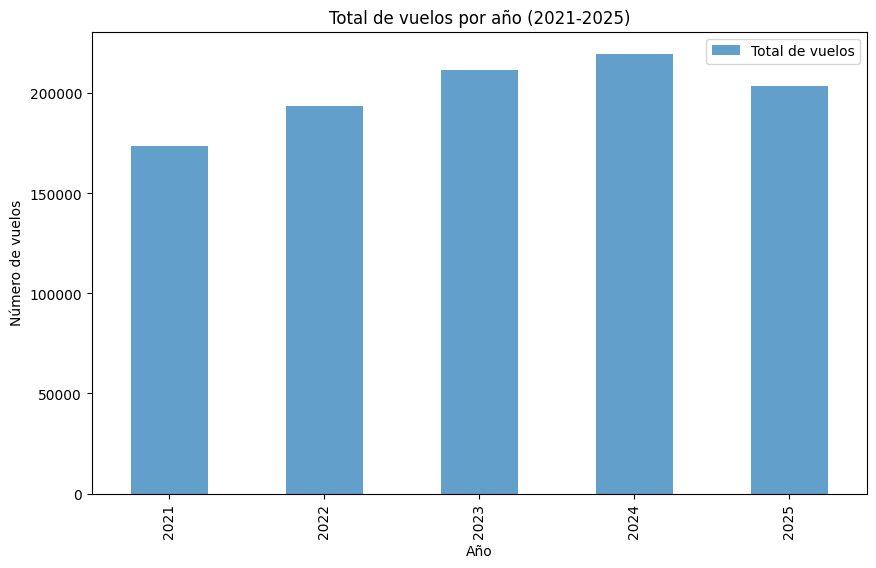

In [44]:
plt.figure(figsize=(10, 6))
annual_summary_number['mean'].plot(kind='bar', alpha=0.7, label="Total de vuelos")
plt.title("Total de vuelos por año (2021-2025)")
plt.xlabel("Año")
plt.ylabel("Número de vuelos")
plt.legend()
plt.show()

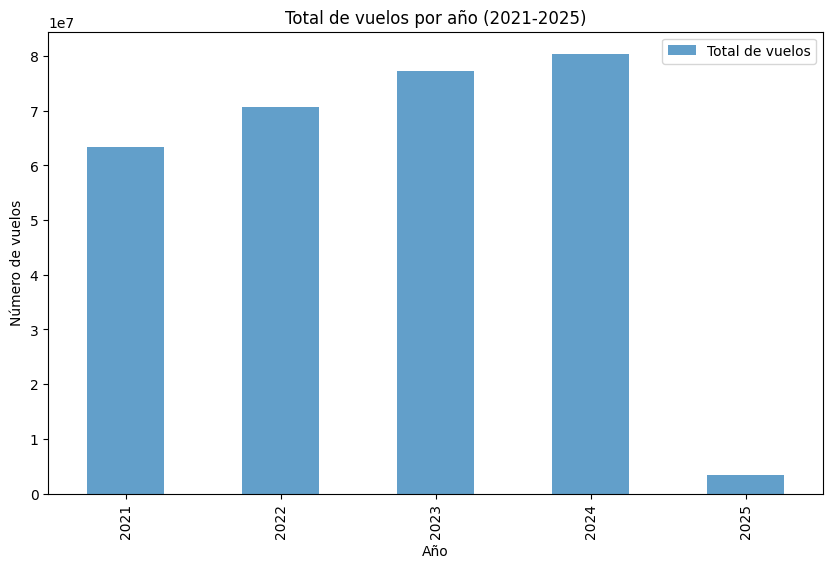

In [46]:
plt.figure(figsize=(10, 6))
annual_summary_number['sum'].plot(kind='bar', alpha=0.7, label="Total de vuelos")
plt.title("Total de vuelos por año (2021-2025)")
plt.xlabel("Año")
plt.ylabel("Número de vuelos")
plt.legend()
plt.show()

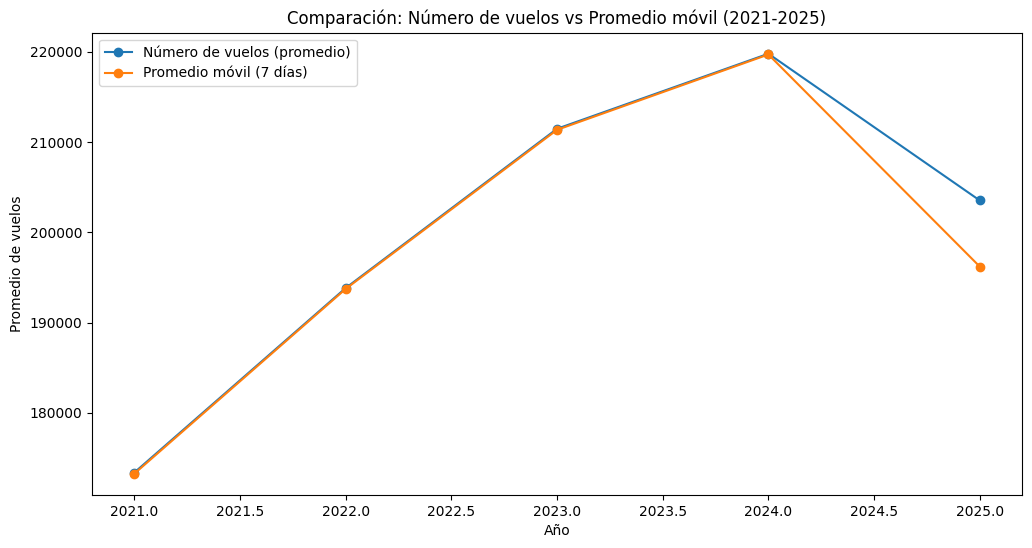

In [45]:
plt.figure(figsize=(12, 6))
number_flights.groupby('Year')['Flights'].mean().plot(label='Número de vuelos (promedio)', marker='o')
moving_average.groupby('Year')['Flights'].mean().plot(label='Promedio móvil (7 días)', marker='o')
plt.title("Comparación: Número de vuelos vs Promedio móvil (2021-2025)")
plt.xlabel("Año")
plt.ylabel("Promedio de vuelos")
plt.legend()
plt.show()
